# Project Proposal

### Title:

Given these 13 factors, does the patient have heart disease?

### Introduction:

Heart disease encompasses a group of conditions that can impair the structure or function of the heart. It can be caused by medical conditions that involve high blood pressure, high cholesterol levels, or lifestyle factors such as insufficient physical activity. Additionally, there are risk factors that increase heart disease that cannot be controlled such as sex, age, and genetics. The Heart Disease dataset from the UCI Machine Learning Repository identifies 13 factors. The objective of our project is to examine some of these potential factors to identify patterns and make predictions that answer our research question: Given these 13 factors, does the patient have heart disease?

### Preliminary exploratory data analysis:

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# ?read_csv

In [3]:
cleavland <-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleavland) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
cleavland <- cleavland |>
    mutate(Number_of_Major_Vessels = as.numeric(Number_of_Major_Vessels)) |>
    mutate(Thal = as.numeric(Thal))
                                                
# cleavland
# test

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [4]:

cleavland0 <- cleavland |>
    filter(Heart_Disease_Diagnosis == 0)
# cleavland0
cleavland1 <- cleavland |>
    filter(Heart_Disease_Diagnosis != 0) |>
    mutate(Heart_Disease_Diagnosis = 1)
# cleavland1
cleavland <- rbind(cleavland0, cleavland1)
# cleavland

In [5]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [6]:
set.seed(1)
data_split <- initial_split(cleavland, prop = 0.75, strata = Heart_Disease_Diagnosis)
training_data <- training(data_split)
testing_date <- testing(data_split)
training_data

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
64,1,1,110,211,0,2,144,1,1.8,2,0,3,0
58,0,1,150,283,1,2,162,0,1.0,1,0,3,0


Age                     Sex         Chest_Pain_Type 
             54.9207048               0.6828194               3.1585903 
 Resting_Blood_Pressure             Cholesterol      Fasting_BloodSugar 
            132.7709251             246.9603524               0.1453744 
            Resting_ECG          Max_Heart_Rate Exercise_Induced_Angina 
              0.9911894             149.3083700               0.3259912 
          ST_Depression                   Slope Number_of_Major_Vessels 
              1.0418502               1.6035242               0.6977778 
                   Thal Heart_Disease_Diagnosis 
              4.7256637               0.4581498

In [25]:
mean_table <- training_data |>
    colMeans(na.rm = TRUE) 
mean_table.matrix = matrix(data = mean_table, nrow = 1, byrow = TRUE)
mean_table.df = as.data.frame(mean_table.matrix)
colnames(mean_table.df) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
mean_table = mean_table.df
mean_table

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.9207,0.6828194,3.15859,132.7709,246.9604,0.1453744,0.9911894,149.3084,0.3259912,1.04185,1.603524,0.6977778,4.725664,0.4581498


`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


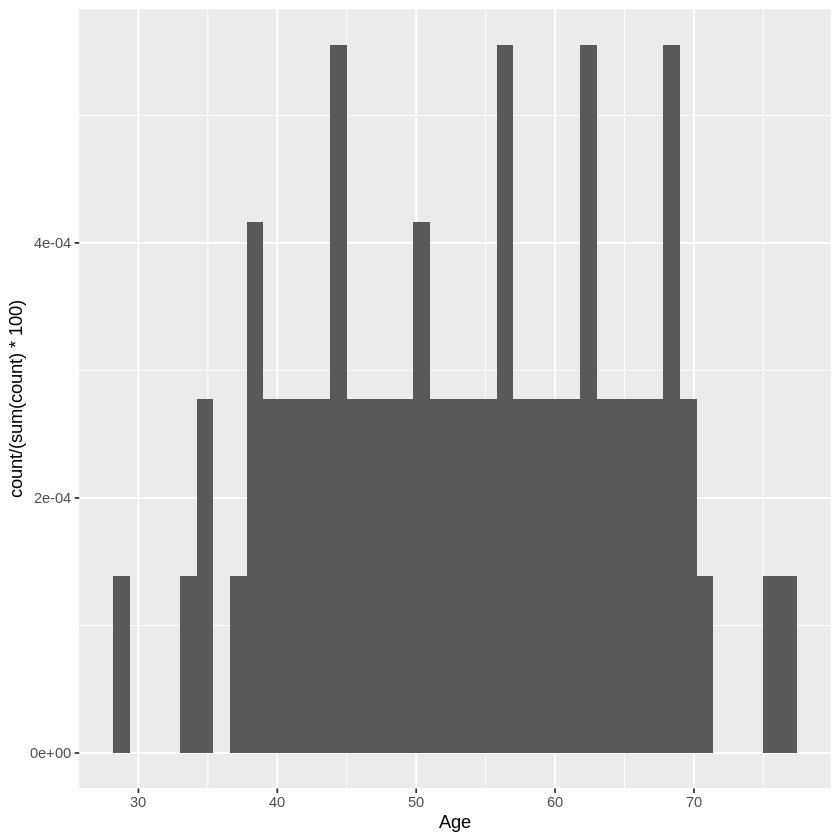

In [71]:
heart_count_table <- training_data |>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n())
               

heart_count_table

heart_age_plot <- ggplot(heart_count_table, aes(x = Age)) + 
                 geom_histogram(aes(y = stat(count)/stat((sum(count)*100))),
                               binwidth = 1.2) 
heart_age_plot

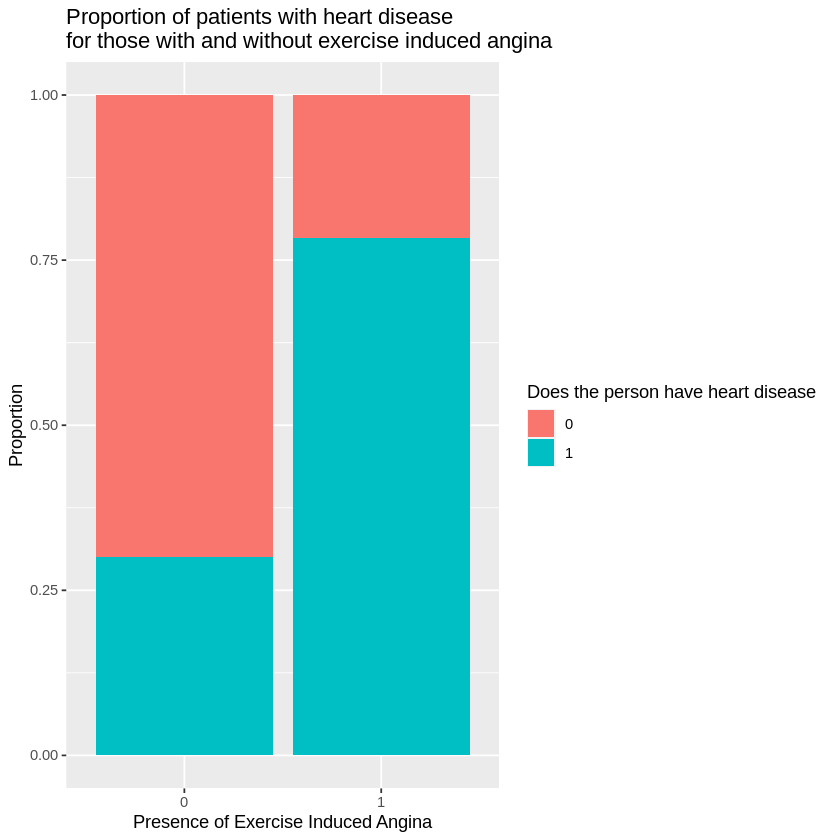

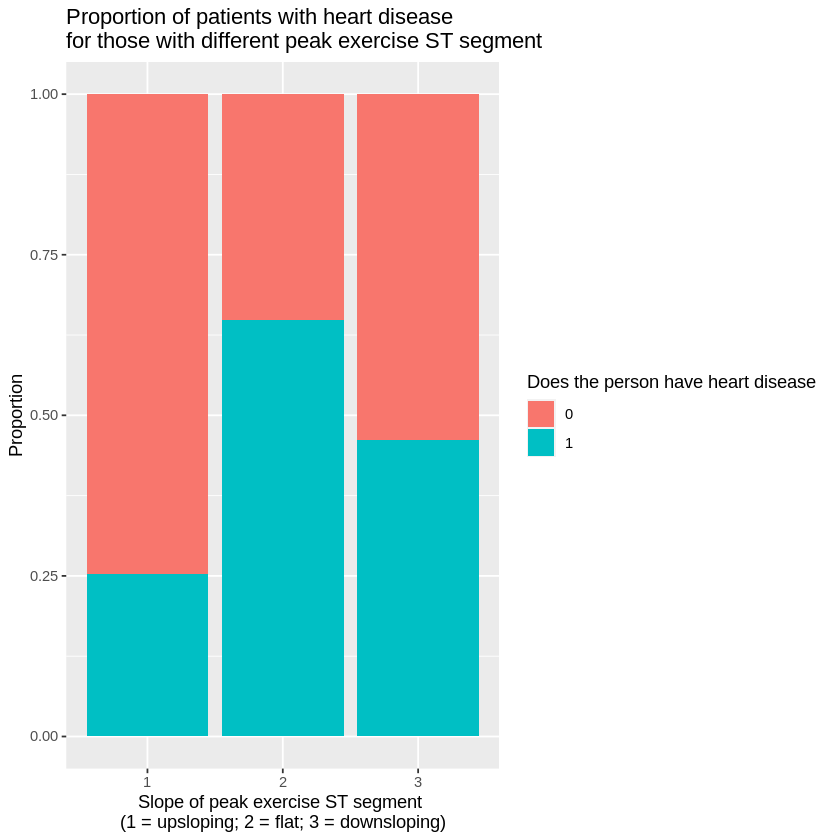

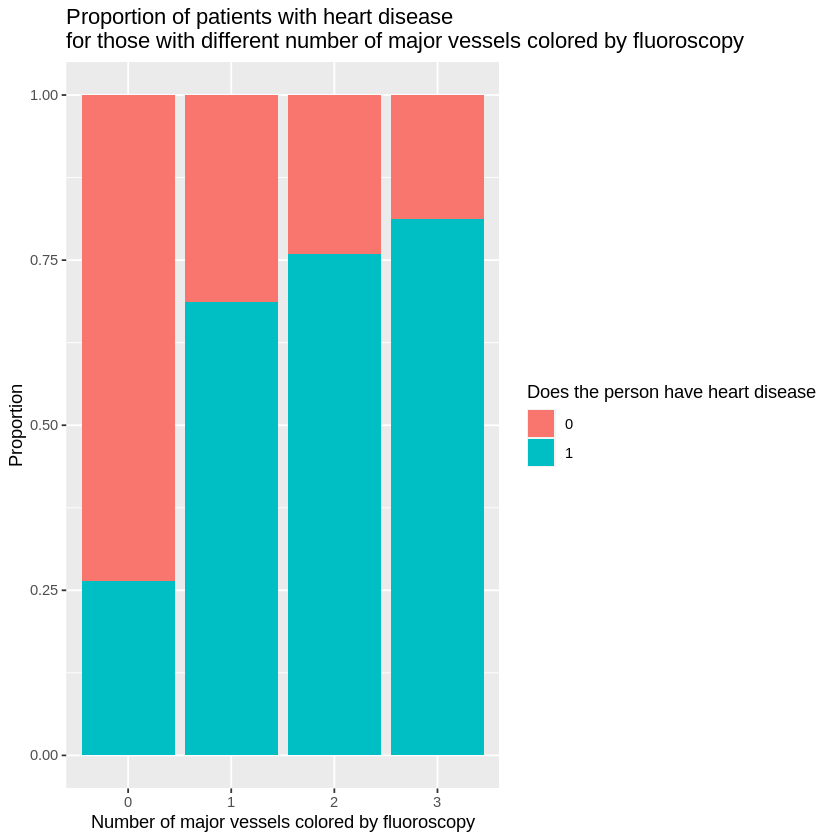

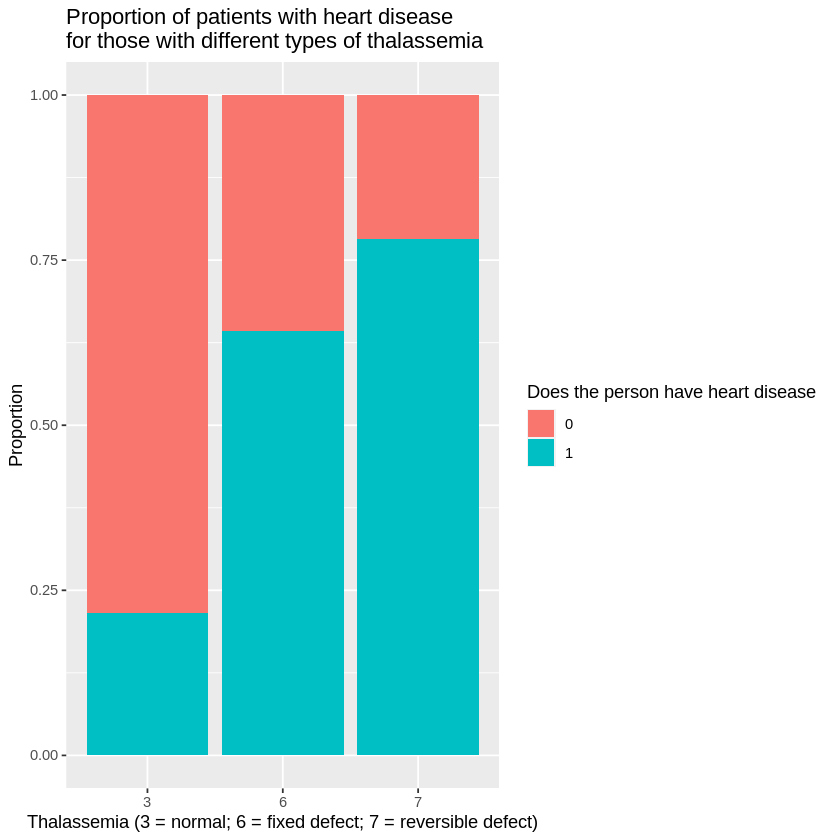

In [64]:
bar_plot9 <- training_data |>
   ggplot(aes(x = as_factor(Exercise_Induced_Angina), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Presence of Exercise Induced Angina") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with and without exercise induced angina")
bar_plot9

bar_plot11 <- training_data |>
   ggplot(aes(x = as_factor(Slope), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Slope of peak exercise ST segment \n(1 = upsloping; 2 = flat; 3 = downsloping)") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with different peak exercise ST segment")
bar_plot11

bar_plot12 <- training_data |>
   filter(!is.na(Number_of_Major_Vessels)) |>
   ggplot(aes(x = as_factor(Number_of_Major_Vessels), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Number of major vessels colored by fluoroscopy") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with different number of major vessels colored by fluoroscopy")
bar_plot12

bar_plot13 <- training_data |>
   filter(!is.na(Thal)) |>
   ggplot(aes(x = as_factor(Thal), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)") +
   ylab("Proportion") +
   labs(fill = "Does the person have heart disease") +
   ggtitle("Proportion of patients with heart disease \nfor those with different types of thalassemia")
bar_plot13

### Methods:

### Expected outcomes and significance: